## Donut colormap

cf. https://twitter.com/profjsb/status/1646575307451944960

built with the help of chatgpt (DOI: 10.6084/m9.figshare.22630570)

BH Image from: L. Medeiros et al. The image of the M87 black hole reconstructed with PRIMO. The Astrophysical Journal Letters. Published online April 13, 2023. doi: 10.3847/2041-8213/acc32d.

--Josh Bloom

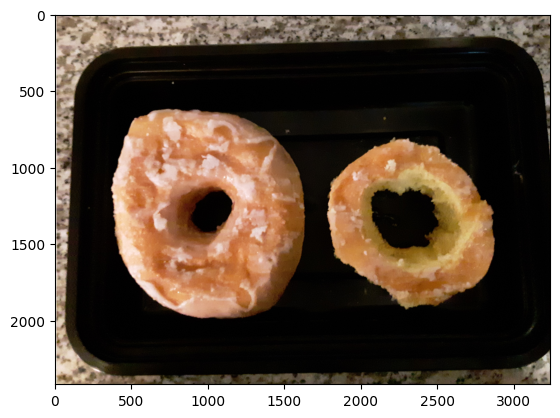

In [30]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.cluster import KMeans, MiniBatchKMeans
%matplotlib inline

img = Image.open('image.jpeg')
plt.imshow(img)

In [31]:
def load_image_colors(image_path):
    img = Image.open(image_path)
    img = img.convert("RGB")
    width, height = img.size
    colors = [img.getpixel((x, y)) for x in range(width) for y in range(height)]
    return colors

# add more images here to capture more donut depictions
image_paths = ['image.jpeg']
all_colors = []

for image_path in image_paths:
    all_colors.extend(load_image_colors(image_path))


In [33]:
n_clusters = 128  # number of salient colors
kmeans = MiniBatchKMeans(n_clusters=n_clusters, n_init="auto", max_iter=100)
kmeans.fit(np.array(all_colors))
salient_colors = kmeans.cluster_centers_/255

In [34]:
def perceived_brightness(color):
    r, g, b = color
    return 0.2126 * r + 0.7152 * g + 0.0722 * b

brightness = [perceived_brightness(color) for color in salient_colors]
sorted_colors = [color for _, color in sorted(zip(brightness, salient_colors), key=lambda pair: pair[0])]

In [19]:
custom_cmap = ListedColormap(sorted_colors)

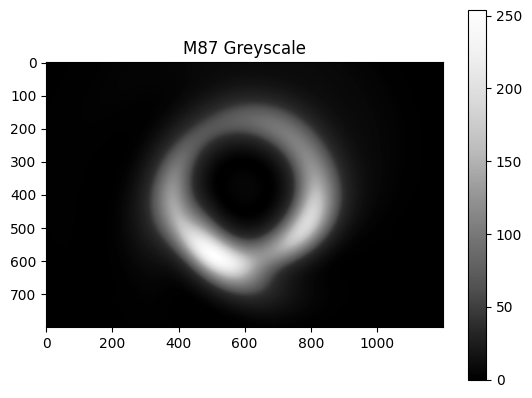

In [35]:
# cf https://www.sciencenews.org/article/first-black-hole-m87-machine-learning
img = Image.open('blackhole1.jpeg').convert('L')
plt.imshow(img, cmap="Greys_r")
plt.title("M87 Greyscale")
plt.colorbar()

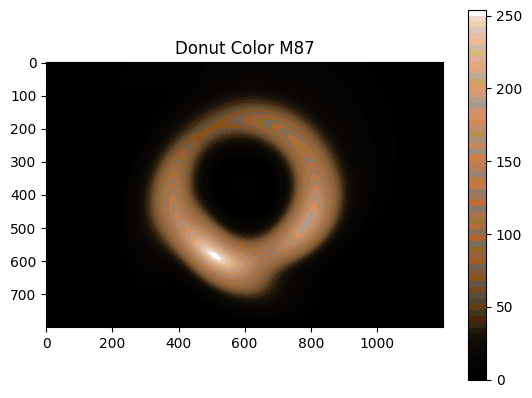

In [36]:
plt.imshow(img, cmap=custom_cmap)
plt.colorbar()
plt.title("Donut Color M87")
plt.show()